In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set_theme()

# Načtení dat

In [2]:
weather = pd.read_csv("https://raw.githubusercontent.com/michaltrejdl/Seaborn/main/seattle-weather.csv", parse_dates=['date'], index_col=0)
print(weather.shape)
print(weather.describe())
print(weather.head())
print(weather.tail())

(1461, 5)
       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000
            precipitation  temp_max  temp_min  wind  weather
date                                                        
2012-01-01            0.0      12.8       5.0   4.7  drizzle
2012-01-02           10.9      10.6       2.8   4.5     rain
2012-01-03            0.8      11.7       7.2   2.3     rain
2012-01-04           20.3      12.2       5.6   4.7     rain
2012-01-05            1.3       8.9       2.8   6.1     rain
            precipitati

In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2012-01-01 to 2015-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 68.5+ KB


In [4]:
print(weather.isna().sum())

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [5]:
print(weather['weather'])
print(weather['weather'].unique())

date
2012-01-01    drizzle
2012-01-02       rain
2012-01-03       rain
2012-01-04       rain
2012-01-05       rain
               ...   
2015-12-27       rain
2015-12-28       rain
2015-12-29        fog
2015-12-30        sun
2015-12-31        sun
Name: weather, Length: 1461, dtype: object
['drizzle' 'rain' 'sun' 'snow' 'fog']


# Vykreslení dat

Jednoduché vykreslení pomocí Pandas wrapperu Matplotlibu

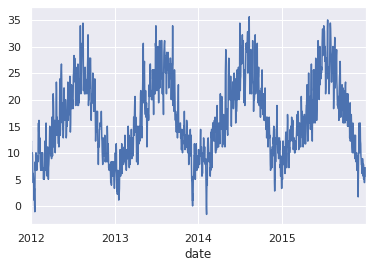

In [6]:
weather['temp_max'].plot();

**Úkol 3**

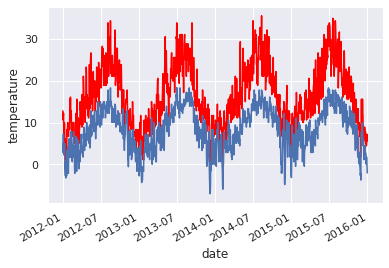

In [7]:
fig, ax = plt.subplots()
sns.lineplot(data=weather, x='date', y='temp_max', ax=ax, color='red')
sns.lineplot(data=weather, x='date', y='temp_min', ax=ax)
plt.ylabel('temperature')
fig.autofmt_xdate()

**Úkol 4 (upravené)**

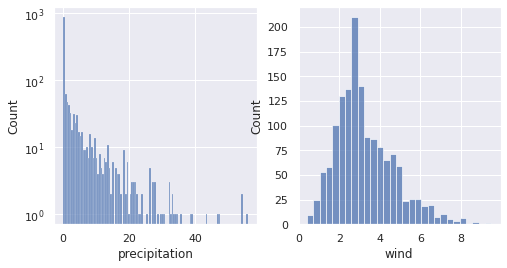

In [8]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
g = sns.histplot(data=np.array(0.1+weather['precipitation']), ax=ax[0])
g.set_yscale('log')
ax[0].set(xlabel='precipitation')
sns.histplot(data=weather, x='wind', ax=ax[1]);

**Úkol 5**

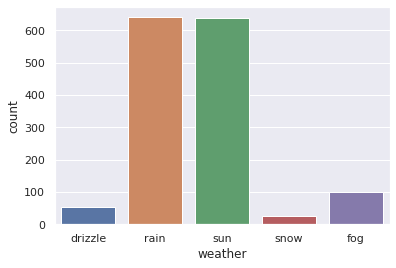

In [9]:
sns.countplot(data=weather, x='weather');

**Úkol 6**

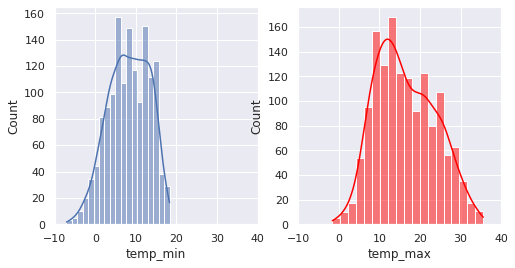

In [10]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
sns.histplot(data=weather, x='temp_min', kde=True, ax=ax[0])
sns.histplot(data=weather, x='temp_max', kde=True, ax=ax[1], color='red')
ax[0].set_xlim(-10, 40)
ax[1].set_xlim(-10, 40);

**Úkol 7**

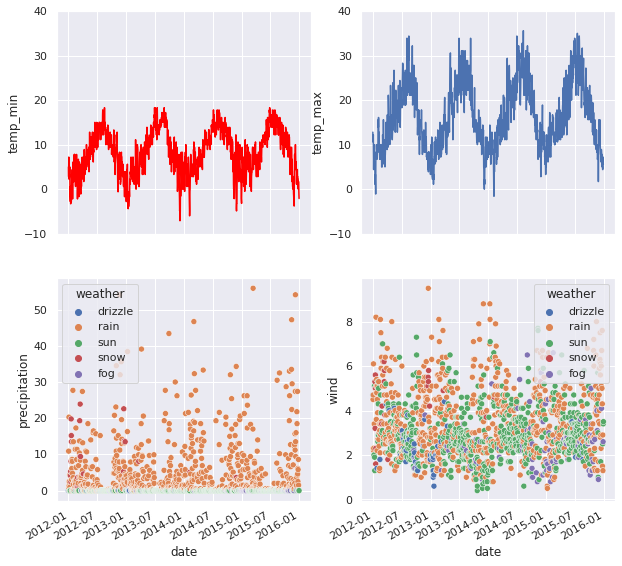

In [11]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.lineplot(data=weather, x='date', y='temp_max', ax=ax[0,1])
ax[0,1].set_ylim(-10, 40)
sns.lineplot(data=weather, x='date', y='temp_min', ax=ax[0,0], color='red')
ax[0,0].set_ylim(-10, 40)
sns.scatterplot(data=weather, x='date', y='precipitation', hue='weather', ax=ax[1,0])
sns.scatterplot(data=weather, x='date', y='wind', hue='weather', ax=ax[1,1])
fig.autofmt_xdate()

**Úkol 8**

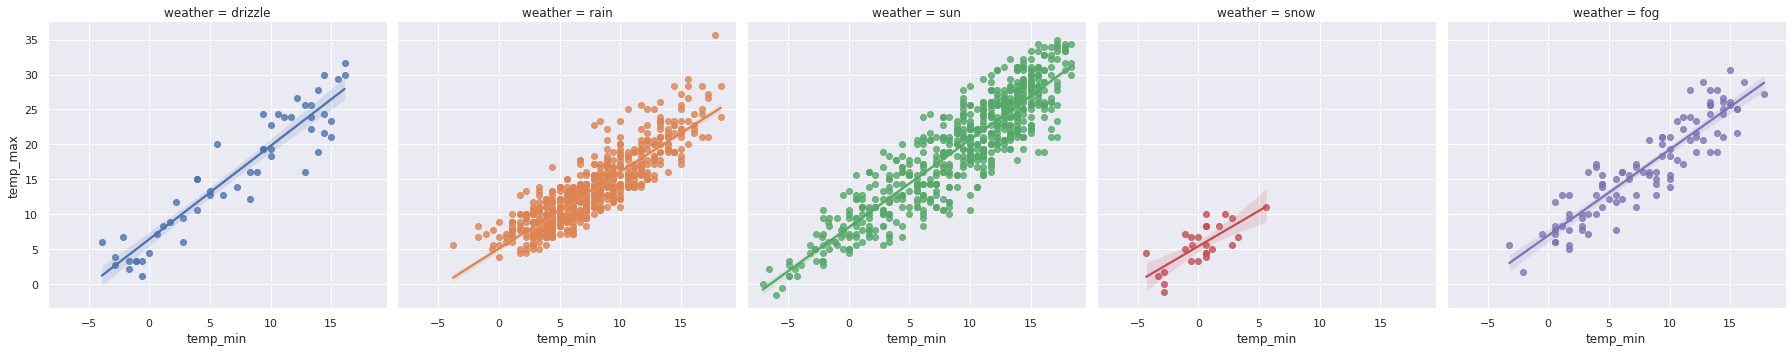

In [12]:
sns.lmplot(data=weather, x='temp_min', y='temp_max', col='weather', hue='weather');

**Úkol 9**

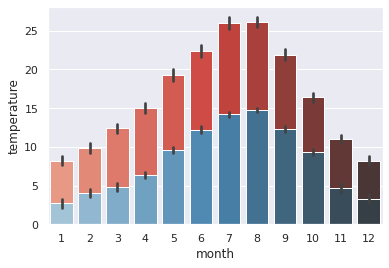

In [14]:
def get_month(x):
  return x.month
weather['month'] = list(map(get_month,weather.index))
sns.barplot(data=weather, x='month', y='temp_max', palette="Reds_d");
sns.barplot(data=weather, x='month', y='temp_min', palette="Blues_d");
plt.ylabel('temperature')
weather = weather.drop(columns='month');

**Úkol 10**

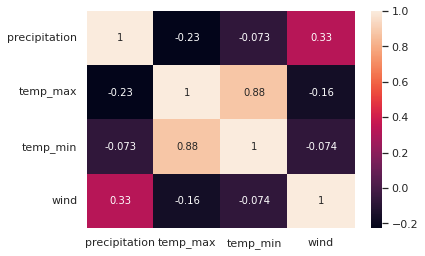

In [15]:
sns.heatmap(data=weather.corr(), annot=True);

**Úkol 11**

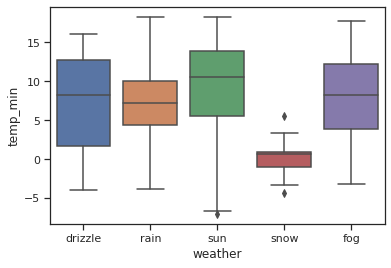

In [18]:
sns.set_style('ticks')
sns.boxplot(data=weather, x='weather', y='temp_min');
sns.set_style()

**Úkol 12**

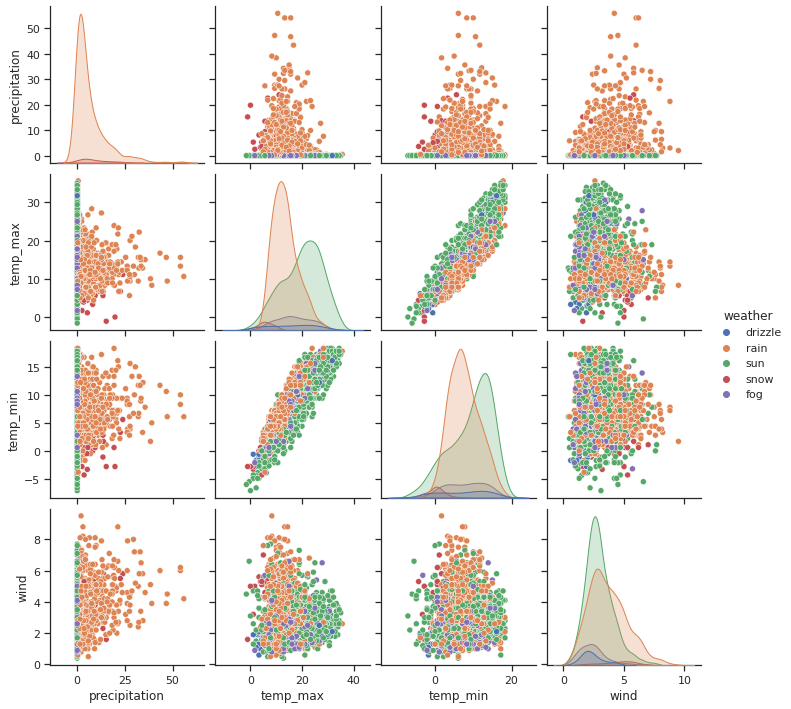

In [19]:
sns.pairplot(data=weather, hue='weather');

**Bonus**

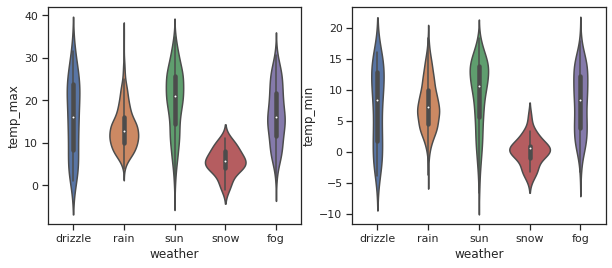

In [20]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
sns.violinplot(data=weather, x='weather', y='temp_max', ax=ax[0])
sns.violinplot(data=weather, x='weather', y='temp_min', ax=ax[1]);

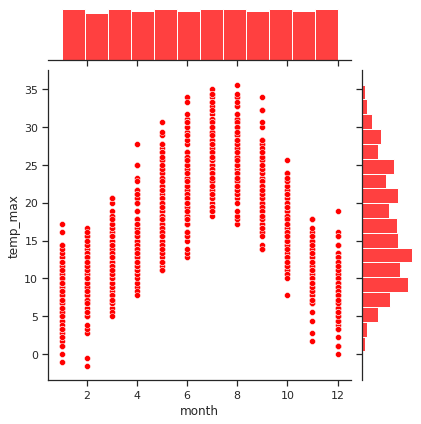

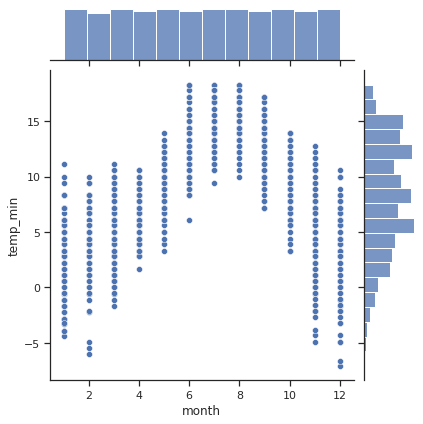

In [21]:
def get_month(x):
  return x.month
weather['month'] = list(map(get_month,weather.index))
sns.jointplot(data=weather, x='month', y='temp_max', color='red')
sns.jointplot(data=weather, x='month', y='temp_min')
weather = weather.drop(columns='month');